In [1]:
import matplotlib.pyplot as plt

In [54]:
class LifNeuron:
  def __init__(self, mv_reset = -70, mv_threshold  = -55, mv_rest = -65, tau = 10, g = 10):
    self.mv_reset = mv_reset  # resting voltage, mV
    self.mv_threshold = mv_threshold  # threshold voltage, mV
    self.mv_rest = mv_rest  # rest voltage, mV
    self.tau = tau  # tau
    self.g = g  # conductance, nanosiemens, nS

    self.membrane_potential = self.mv_rest # 현재의 membrane potential을 저장할 변수를 추가하고, rest voltage로 초기화한다.
  
  def step(self, input_current_pa=0, dt=0.001):
    """
    delta t 의 크기와 delta t 동안 흐르는 전류의 양을 입력받고, 뉴런의 다양한 값들을 반환한다.
    
    Inputs
    ------
    input_current_pa : 주입되는 전류량. 단위는 pA(피코암페어)이다.
    dt : delta t의 크기. 기본값은 millisecond인 0.001초이다.

    Return
    ------
    infos [Dict]
      - membrane_potential : 현재 membrane potential 값, mV.
      - is_spike : 현재 뉴런의 action potential이 생성되었는지를 booloean 값으로 반환.

    """
    is_spike = False
    dV = (-(self.membrane_potential - self.mv_rest) / self.tau + self.g * input_current_pa) * dt
    self.membrane_potential += dV
    
    if self.membrane_potential >= self.mv_threshold:
        is_spike = True
        self.membrane_potential = self.mv_reset

    infos = {
        "membrane_potential": self.membrane_potential,
        "is_spike": is_spike
    }

    return infos

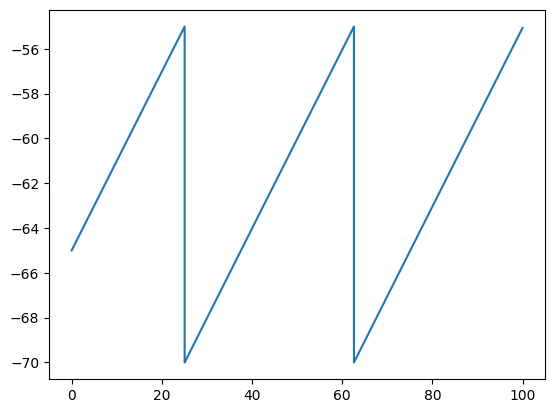

In [72]:
if __name__=="__main__":
  observe_ms = 100000 # millisecond, 10초동안 관찰

  neuron1 = LifNeuron() # 뉴런 생성
  neuron1.tau = 10
  membrane_potential_history = [] # 10초동안의 membrane potential을 기록할 리스트, y축
  dt_history = [i/1000 for i in range(observe_ms)]  # 시간(초), x축
  
  for ms in range(observe_ms):
    infos = neuron1.step(input_current_pa = 40, dt = 1e-6)
    membrane_potential_history.append(infos["membrane_potential"])

  plt.plot(dt_history, membrane_potential_history)
  plt.show()


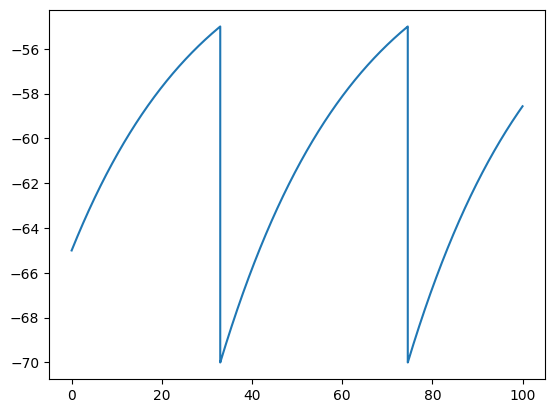

In [83]:
if __name__=="__main__":
  observe_ms = 100000 # millisecond, 10초동안 관찰

  neuron1 = LifNeuron() # 뉴런 생성
  neuron1.tau = 0.06
  membrane_potential_history = [] # 10초동안의 membrane potential을 기록할 리스트, y축
  dt_history = [i/1000 for i in range(observe_ms)]  # 시간(초), x축
  
  for ms in range(observe_ms):
    infos = neuron1.step(input_current_pa = 50, dt = 1e-6)
    membrane_potential_history.append(infos["membrane_potential"])

  plt.plot(dt_history, membrane_potential_history)
  plt.show()

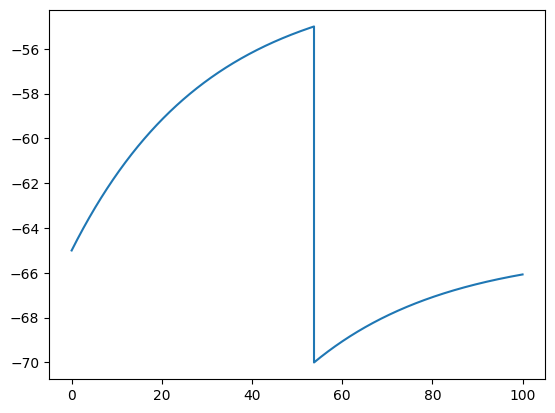

In [80]:
if __name__=="__main__":
  observe_ms = 100000 # millisecond, 10초동안 관찰

  neuron1 = LifNeuron() # 뉴런 생성
  neuron1.tau = 0.06
  membrane_potential_history = [] # 10초동안의 membrane potential을 기록할 리스트, y축
  dt_history = [i/1000 for i in range(observe_ms)]  # 시간(초), x축
  
  spikedFlag = False
  
  for ms in range(observe_ms):
    if spikedFlag:
      infos = neuron1.step(input_current_pa = 0, dt = 1e-6)
    else:
      infos = neuron1.step(input_current_pa = 40, dt = 1e-6)
      if infos['is_spike']:
        spikedFlag = True
        
    membrane_potential_history.append(infos["membrane_potential"])

  plt.plot(dt_history, membrane_potential_history)
  plt.show()

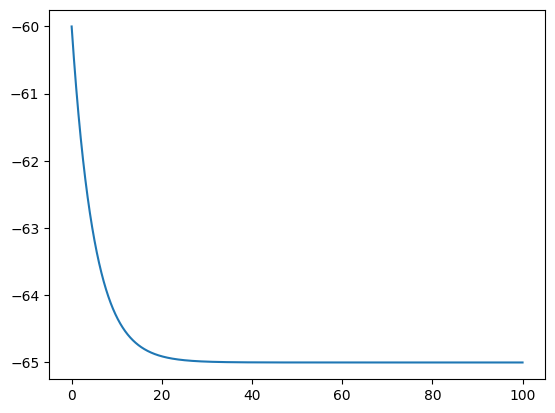

In [84]:
if __name__=="__main__":
  observe_ms = 100000 # millisecond, 10초동안 관찰

  neuron1 = LifNeuron() # 뉴런 생성
  neuron1.membrane_potential = -60
  neuron1.tau = 10
  membrane_potential_history = [] # 10초동안의 membrane potential을 기록할 리스트, y축
  dt_history = [i/1000 for i in range(observe_ms)]  # 시간(초), x축
  
  for ms in range(observe_ms):
    infos = neuron1.step(input_current_pa=0, dt=0.001)
    membrane_potential_history.append(infos["membrane_potential"])

  plt.plot(dt_history, membrane_potential_history)
  plt.show()